In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(1600, 6)


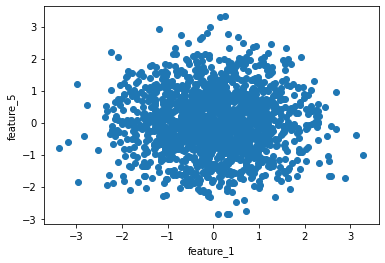

In [4]:
df=pd.read_csv('Train.csv.txt')
data=df.values
print(data.shape)
plt.scatter(data[:,0],data[:,4])
plt.xlabel('feature_1')
plt.ylabel('feature_5')
plt.show()

In [174]:
df.head(n=2)

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960


In [175]:
df=pd.read_csv('Train.csv.txt')
dft=pd.read_csv('Test.csv.txt')
x=df.values
X=x[:,0:5]
Y=x[:,5]
x_test=dft.values
X_test=x_test[:,0:5]
Y_test=x_test[:,5]
print(X.shape,Y.shape)
print(X_test.shape,Y_test.shape)

(1600, 5) (1600,)
(400, 5) (400,)


In [190]:
# Gradient Descent Algorithm

def hypothesis(z,theta):
    return theta[0]+(theta[1]*z[0])+(theta[2]*z[1])+(theta[3]*z[2])+(theta[4]*z[3])+(theta[5]*z[4])

def error(X,Y,theta):
    
    m=X.shape[0]
    e=0
    for i in range(m):
        hx=hypothesis(X[i],theta)
        e+=(Y[i]-hx)**2
    return e*0.5

def batch_gradient(X,Y,theta,batch_size=5):
    
    m=X.shape[0]
    n=X.shape[1]
    indices=np.arange(m)
    np.random.shuffle(indices)
    indices=indices[:batch_size]
    grad=np.zeros((6,))
    grad_not=np.array([0.0])
    
    for i in indices:
        grad_not[0]+=(hypothesis(X[i],theta)-Y[i])
        for j in range(5):
            hx=hypothesis(X[i],theta)
            grad[j]+=(hx-Y[i])*X[i,j]
    return np.append(grad_not,grad)

def gradientDescent(X,Y,learning_rate=0.001):
    
    theta=np.zeros((6,))
    itr=0
    e=0
    error_list=[]
    
    while(itr<=900):
        grad=batch_gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        for j in range(6):
            theta[j]=theta[j]-learning_rate*grad[j]
        itr+=1
    return theta,error_list

    
    
    
    

In [191]:
final_theta,error_list=gradientDescent(X,Y)

In [192]:
print(final_theta)

[ 5.83881429 29.46399363 91.95932454  7.39624697 44.05843303  2.63932973]


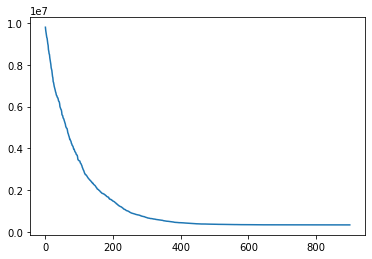

In [193]:
plt.plot(error_list)
plt.show()

In [194]:
m=X.shape[0]
indices=np.arange(m)
np.random.shuffle(indices)
indices=indices[:5]
print(indices)

[   2  654 1332  739 1322]


In [195]:
from sklearn.linear_model import LinearRegression
print('Coefficients calculated by mini-batch: ',final_theta[1:])
print('Intercept calculated by mini-batch: ',final_theta[0])
lr=LinearRegression()
lr.fit(X,Y)
print('Coefficients calculated by sklearn',lr.coef_)
print('Intercept calculated by sklearn',lr.intercept_)

Coefficients calculated by mini-batch:  [29.46399363 91.95932454  7.39624697 44.05843303  2.63932973]
Intercept calculated by mini-batch:  5.838814292243195
Coefficients calculated by sklearn [29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]
Intercept calculated by sklearn 4.990966735574959


In [196]:
from sklearn.metrics import r2_score
y_train_predicted=np.zeros((1600,))
m=X.shape[0]
for i in range(m):
    y_train_predicted[i]=hypothesis(X[i],final_theta)
print('r2 score on training set',r2_score(Y,y_train_predicted))
y_test_predicted=np.zeros((400,))
n=X_test.shape[0]
for i in range(n):
    y_test_predicted[i]=hypothesis(X_test[i],final_theta)
print('r2 score on test set',r2_score(Y_test,y_test_predicted))
print('Accuracy calculated by sklearn',lr.score(X,Y))

r2 score on training set 0.9658734832213238
r2 score on test set 0.9689990904545636
Accuracy calculated by sklearn 0.9660939669975616
